For examining post processed results of synthesized FA models

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pathlib

import matplotlib.pyplot as plt
import torch

from probabilistic_model_synthesis.gaussian_nonlinear_dim_reduction import Fitter

In [3]:
%matplotlib notebook

## Parameters go here

In [6]:
ps = dir()

# Directory holding results
pp_dir = r'/groups/bishop/bishoplab/projects/probabilistic_model_synthesis/results/real_data/gnldr/across_cond_transfer_analysis/v5/omr_l_ns/subj_9/multi_cond'
pp_file = r'pp_fit_results.pt'

# Specify the fit type we want to look at 
mdl_type = 'ip'


## Load post processed results

In [7]:
pp_rs = torch.load(pathlib.Path(pp_dir) / pp_file)
latents = pp_rs[mdl_type]['latents']
cp_results = pp_rs[mdl_type]['cp_results']
elbo_vls = pp_rs[mdl_type]['elbo_vls']
period_elbo_vls = pp_rs[mdl_type]['period_elbo_vls']

subject_order = pp_rs['subject_order']

## Look at fitting logs

<IPython.core.display.Javascript object>


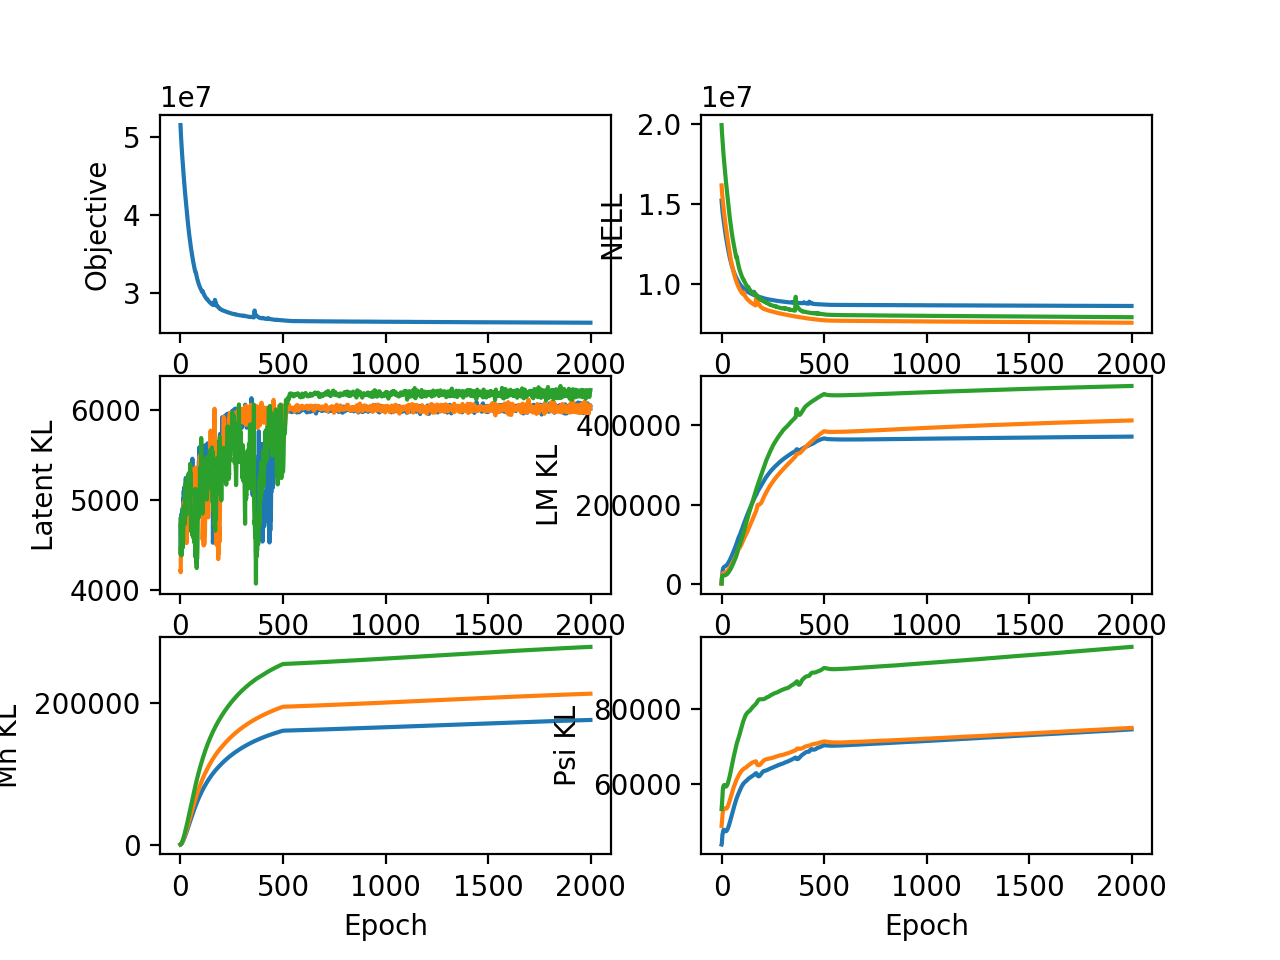

In [8]:
for log in pp_rs[mdl_type]['logs']:
    Fitter.plot_log(log)

## Look at a log for latent estimation

<IPython.core.display.Javascript object>


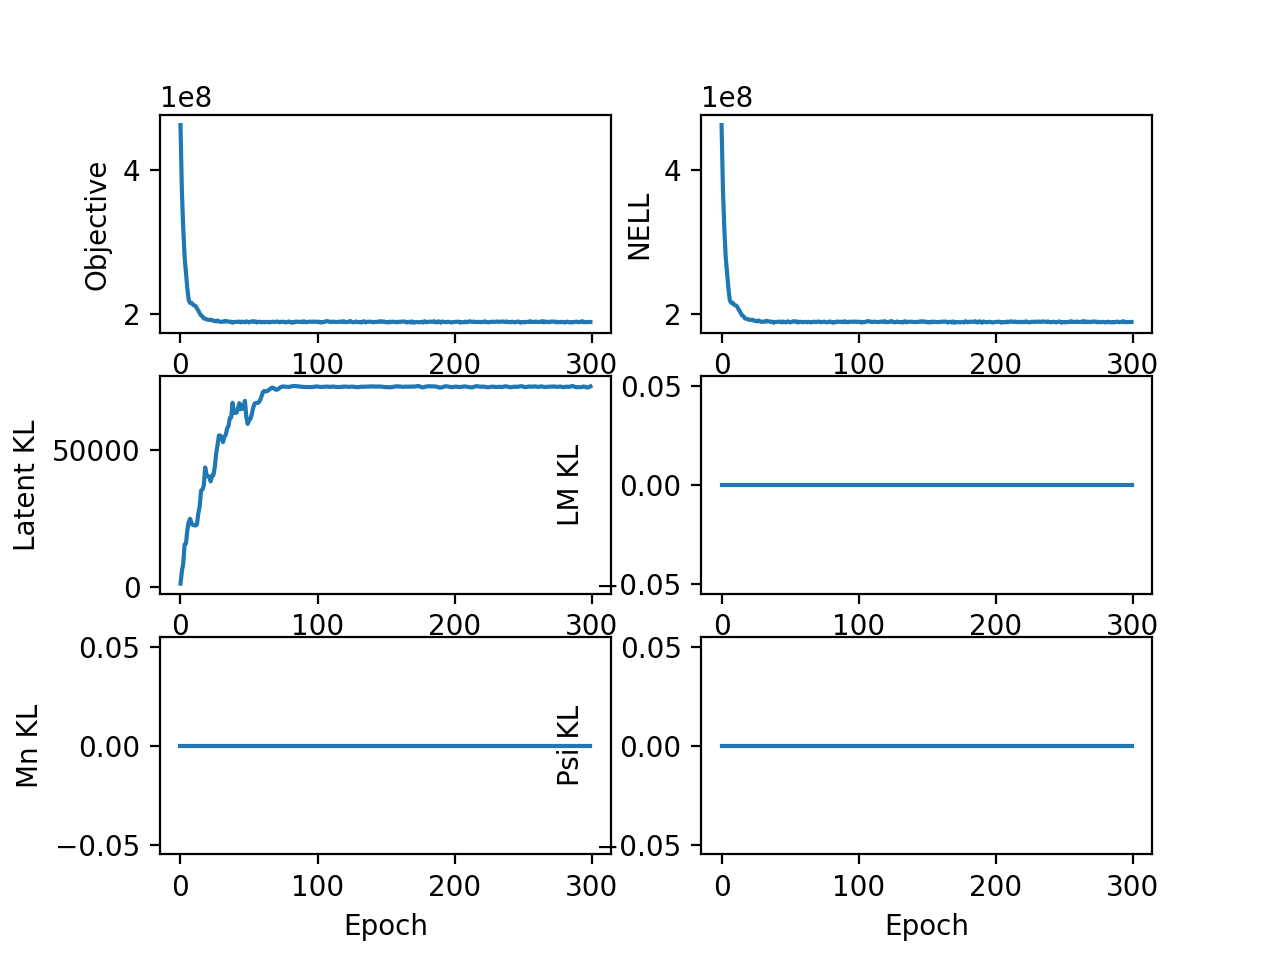

In [9]:
latent_log = latents[8]['test']['log']
Fitter.plot_log(latent_log)

## Look at a log for the latent estimation for check point evaluation 

<IPython.core.display.Javascript object>


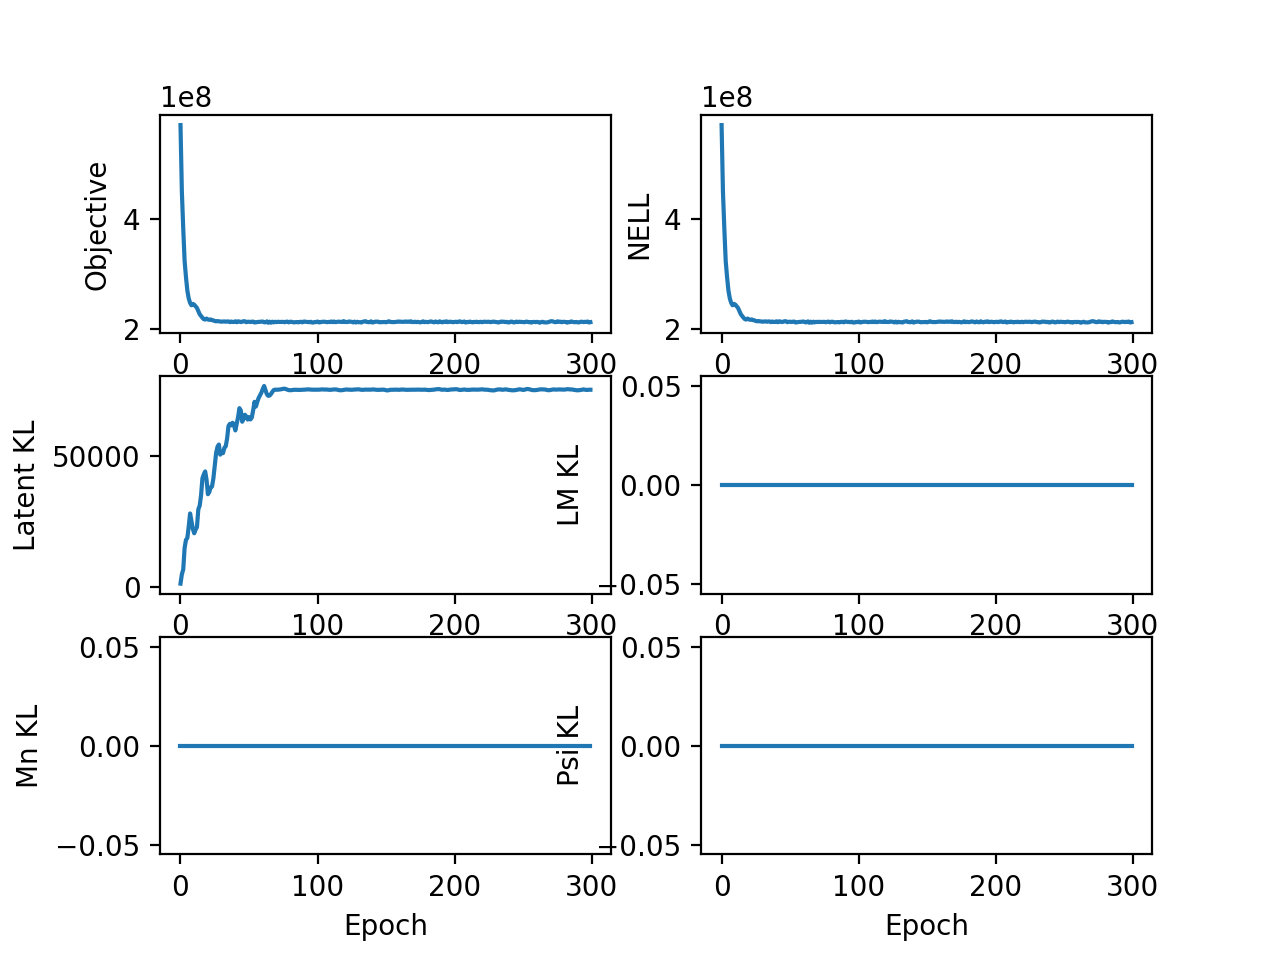

In [10]:
cp_log = cp_results['cp_logs']['test'][8][0]
Fitter.plot_log(cp_log)

## Look at performance across check points

In [11]:
cp_epochs = cp_results['epochs']
elbo_perf = cp_results['cp_perf']['validation']

In [14]:
elbo_perf

array([[-3042203.25, -3323813.75, -4157220.75],
       [-2398168.25, -2193606.25, -2582586.25],
       [-2501577.  , -2197440.25, -2611198.  ],
       [-2573871.75, -2251662.25, -2705343.5 ],
       [-2614181.75, -2282328.  , -2762736.25],
       [-2649390.5 , -2313661.25, -2806170.75],
       [-2644842.75, -2308396.75, -2801089.25],
       [-2647601.75, -2310573.5 , -2803278.75],
       [-2648072.75, -2312693.75, -2805724.75],
       [-2651671.75, -2314996.5 , -2809783.25],
       [-2653619.75, -2317569.25, -2812160.25],
       [-2653142.  , -2320186.75, -2815535.5 ],
       [-2655858.  , -2322589.5 , -2818678.25],
       [-2658248.75, -2324729.5 , -2820730.  ],
       [-2659631.25, -2327460.75, -2824802.  ],
       [-2659909.75, -2329515.75, -2828060.75],
       [-2662589.5 , -2332189.  , -2830224.25],
       [-2664261.  , -2334504.75, -2832683.75],
       [-2664998.25, -2336676.25, -2836020.25],
       [-2667303.75, -2338209.75, -2838374.75],
       [-2669347.75, -2340613.25, -28401

<IPython.core.display.Javascript object>


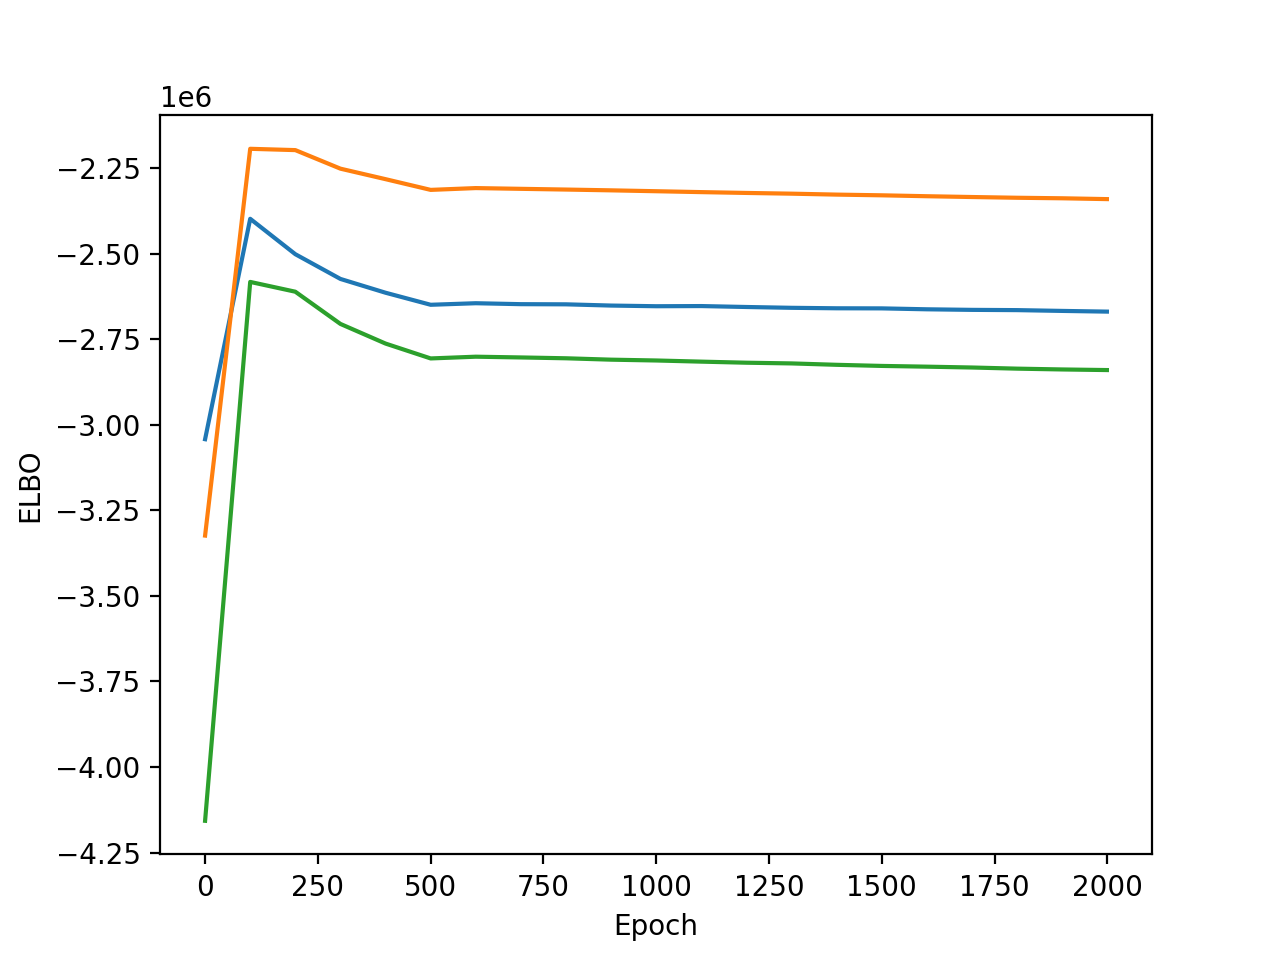

Text(0, 0.5, 'ELBO')

In [12]:
plt.figure()
_, plt.plot(cp_epochs, elbo_perf)
plt.xlabel('Epoch')
plt.ylabel('ELBO')